<a href="https://colab.research.google.com/github/Ismail-therap/NLP-Project-Predicting-review-in-1-to-5-star-/blob/main/LSTM_5%2C3_and_2_category_sentiment_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM

# Required libraries

In [35]:
# Importing required libraries
import nltk
import tensorflow as tf
import pandas as pd
from nltk.corpus import stopwords
from textblob import Word
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import wordcloud
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt



# Loading data

In [63]:
import pandas as pd

url='https://drive.google.com/file/d/1-vBpWV0H0cxX5jSeHlQIKXIiosMKwq2t/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)

#df.head()

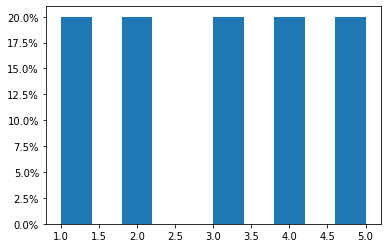

In [64]:
uniformed_review = df
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
plt.hist(uniformed_review["review_stars"],weights=np.ones(len(uniformed_review["review_stars"])) / len(uniformed_review["review_stars"]))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

# 5 CATEGORY Sentiment prediction

```
# This is formatted as code
```



In [65]:
uniformed_review.dtypes

business_id      object
name             object
address          object
city             object
state            object
postal_code      object
latitude        float64
longitude       float64
stars           float64
review_count      int64
is_open           int64
attributes       object
categories       object
hours            object
user_id          object
review_stars      int64
text             object
date             object
dtype: object

In [66]:
trunc = 1000

## sampling neutral review:
reviews1 = uniformed_review[uniformed_review["review_stars"] == 1]
reviews1 = reviews1.sample(n=trunc)

## sampling negative review:
reviews2 = uniformed_review[uniformed_review["review_stars"] == 2]
reviews2 = reviews2.sample(n=trunc)


## sampling positive review:
reviews3 = uniformed_review[uniformed_review["review_stars"] == 3]
reviews3 = reviews3.sample(n=trunc)

## sampling positive review:
reviews4 = uniformed_review[uniformed_review["review_stars"] == 4]
reviews4 = reviews4.sample(n=trunc)

## sampling positive review:
reviews5 = uniformed_review[uniformed_review["review_stars"] == 5]
reviews5 = reviews5.sample(n=trunc)

uniformed_review = reviews1.append([reviews2, reviews3,reviews4,reviews5])
uniformed_review.shape

(5000, 18)

In [67]:
# Encoded the target column
lb=LabelEncoder()
uniformed_review['sentiment'] = lb.fit_transform(uniformed_review['review_stars'].values)

tokenizer = Tokenizer(num_words=500, split=' ') 
tokenizer.fit_on_texts(uniformed_review['text'].values)
X = tokenizer.texts_to_sequences(uniformed_review['text'].values)
X = pad_sequences(X)

#Splitting the data into training and testing
y=pd.get_dummies(uniformed_review['review_stars'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [68]:
model = Sequential()
model.add(Embedding(500, 120, input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(176, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(5,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 779, 120)          60000     
                                                                 
 spatial_dropout1d_4 (Spatia  (None, 779, 120)         0         
 lDropout1D)                                                     
                                                                 
 lstm_4 (LSTM)               (None, 176)               209088    
                                                                 
 dense_4 (Dense)             (None, 5)                 885       
                                                                 
Total params: 269,973
Trainable params: 269,973
Non-trainable params: 0
_________________________________________________________________
None


In [69]:
import time
start = time.time()



batch_size = 32
X_train1 = X_train[batch_size:]
y_train1 = y_train[batch_size:]
X_valid = X_train[:batch_size]
y_valid = y_train[:batch_size]


history = model.fit(X_train1, y_train1, validation_data=(X_valid,y_valid), epochs = 3, batch_size=batch_size, verbose = 'auto')

end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)


print("Execution time: "+"{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

Epoch 1/3
109/109 [==============================] - 383s 3s/step - loss: 1.5581 - accuracy: 0.2869 - val_loss: 1.4654 - val_accuracy: 0.2500
Epoch 2/3
109/109 [==============================] - 373s 3s/step - loss: 1.3125 - accuracy: 0.4308 - val_loss: 1.2826 - val_accuracy: 0.3750
Epoch 3/3
109/109 [==============================] - 366s 3s/step - loss: 1.1432 - accuracy: 0.5035 - val_loss: 1.1981 - val_accuracy: 0.5000
Execution time: 00:19:24.98


In [70]:
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 47.93


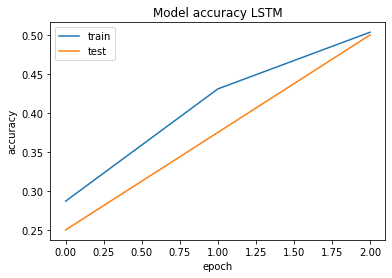

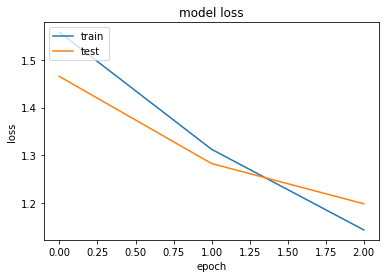

In [71]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy LSTM')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#

# 3 category sentiment prediction

## Creating 3 categories for the ratings



In [29]:
# create a list of our conditions
conditions = [
    (uniformed_review['review_stars'] <= 2),
    (uniformed_review['review_stars'] == 3),
    (uniformed_review['review_stars'] > 3)
    ]

# create a list of the values we want to assign for each condition
values = [0, 1,2]

# create a new column and use np.select to assign values to it using our lists as arguments
uniformed_review['three_star'] = np.select(conditions, values)

# display updated DataFrame
#uniformed_review.head()

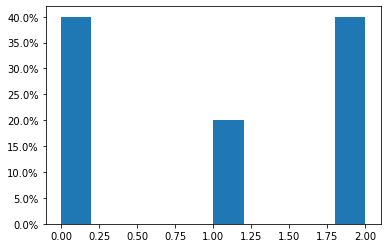

In [30]:
plt.hist(uniformed_review["three_star"],weights=np.ones(len(uniformed_review["three_star"])) / len(uniformed_review["three_star"]))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

In [31]:
reviews_smallest = uniformed_review[uniformed_review["three_star"] == 1]

## sampling negative review:
reviews_neg = uniformed_review[uniformed_review["three_star"] == 0]
reviews_neg = reviews_neg.sample(n=reviews_smallest.shape[0])


## sampling positive review:
reviews_pos = uniformed_review[uniformed_review["three_star"] == 2]
reviews_pos = reviews_pos.sample(n=reviews_smallest.shape[0])

uniformed_review = reviews_smallest.append([reviews_neg, reviews_pos])
uniformed_review.shape

(30000, 19)

# Truncating to 500 sample to speed up the process

In [32]:
trunc = 1000

## sampling neutral review:
reviews_utral = uniformed_review[uniformed_review["three_star"] == 1]
reviews_utral = reviews_utral.sample(n=trunc)

## sampling negative review:
reviews_neg = uniformed_review[uniformed_review["three_star"] == 0]
reviews_neg = reviews_neg.sample(n=trunc)


## sampling positive review:
reviews_pos = uniformed_review[uniformed_review["three_star"] == 2]
reviews_pos = reviews_pos.sample(n=trunc)

uniformed_review = reviews_utral.append([reviews_neg, reviews_pos])
uniformed_review.shape

(3000, 19)

In [36]:
# Encoded the target column
lb=LabelEncoder()
uniformed_review['sentiment'] = lb.fit_transform(uniformed_review['three_star'].values)

tokenizer = Tokenizer(num_words=500, split=' ') 
tokenizer.fit_on_texts(uniformed_review['text'].values)
X = tokenizer.texts_to_sequences(uniformed_review['text'].values)
X = pad_sequences(X)

#Splitting the data into training and testing
y=pd.get_dummies(uniformed_review['three_star'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)




In [37]:
model = Sequential()
model.add(Embedding(500, 120, input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(176, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 709, 120)          60000     
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 709, 120)         0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 176)               209088    
                                                                 
 dense_1 (Dense)             (None, 3)                 531       
                                                                 
Total params: 269,619
Trainable params: 269,619
Non-trainable params: 0
_________________________________________________________________
None


In [38]:
import time
start = time.time()



batch_size = 32
X_train1 = X_train[batch_size:]
y_train1 = y_train[batch_size:]
X_valid = X_train[:batch_size]
y_valid = y_train[:batch_size]


history = model.fit(X_train1, y_train1, validation_data=(X_valid,y_valid), epochs = 3, batch_size=batch_size, verbose = 'auto')

end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)


print("Execution time: "+"{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

Epoch 1/3
65/65 [==============================] - 204s 3s/step - loss: 1.0773 - accuracy: 0.3994 - val_loss: 0.9640 - val_accuracy: 0.5000
Epoch 2/3
65/65 [==============================] - 199s 3s/step - loss: 0.9121 - accuracy: 0.5522 - val_loss: 0.9068 - val_accuracy: 0.5000
Epoch 3/3
65/65 [==============================] - 197s 3s/step - loss: 0.8216 - accuracy: 0.6199 - val_loss: 0.8618 - val_accuracy: 0.5625
Execution time: 00:10:24.89


In [39]:
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 59.22


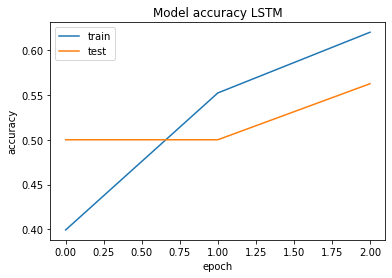

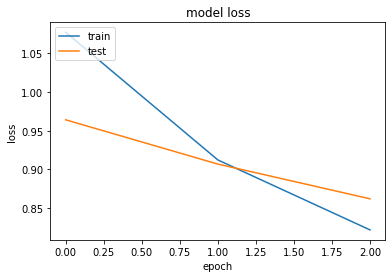

In [40]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy LSTM')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Two category sentiment prediciton

In [52]:
uniformed_review = pd.read_csv(dwn_url)
uniformed_review.shape

(50000, 18)

In [53]:
# create a list of our conditions
conditions = [
    (uniformed_review['review_stars'] <= 2),
    (uniformed_review['review_stars'] == 3),
    (uniformed_review['review_stars'] > 3)
    ]

# create a list of the values we want to assign for each condition
values = [0,-1,1]

# create a new column and use np.select to assign values to it using our lists as arguments
uniformed_review['two_star'] = np.select(conditions, values)


uniformed_review = uniformed_review[uniformed_review.two_star != -1]

# display updated DataFrame
uniformed_review.shape

(40000, 19)

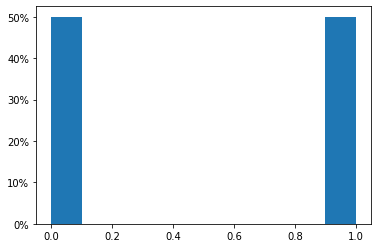

In [54]:
plt.hist(uniformed_review["two_star"],weights=np.ones(len(uniformed_review["two_star"])) / len(uniformed_review["two_star"]))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

## Truncating 1000 sample

In [55]:
trunc = 1000

## sampling negative review:
reviews_neg = uniformed_review[uniformed_review["two_star"] == 0]
reviews_neg = reviews_neg.sample(n=trunc)


## sampling positive review:
reviews_pos = uniformed_review[uniformed_review["two_star"] == 1]
reviews_pos = reviews_pos.sample(n=trunc)

uniformed_review = reviews_neg.append([reviews_pos])
uniformed_review.shape

(2000, 19)

In [56]:
# Encoded the target column
lb=LabelEncoder()
uniformed_review['sentiment'] = lb.fit_transform(uniformed_review['two_star'].values)

tokenizer = Tokenizer(num_words=500, split=' ') 
tokenizer.fit_on_texts(uniformed_review['text'].values)
X = tokenizer.texts_to_sequences(uniformed_review['text'].values)
X = pad_sequences(X)

#Splitting the data into training and testing
y=pd.get_dummies(uniformed_review['two_star'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [59]:
model = Sequential()
model.add(Embedding(500, 120, input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(176, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 798, 120)          60000     
                                                                 
 spatial_dropout1d_3 (Spatia  (None, 798, 120)         0         
 lDropout1D)                                                     
                                                                 
 lstm_3 (LSTM)               (None, 176)               209088    
                                                                 
 dense_3 (Dense)             (None, 2)                 354       
                                                                 
Total params: 269,442
Trainable params: 269,442
Non-trainable params: 0
_________________________________________________________________
None


In [60]:
import time
start = time.time()



batch_size = 32
X_train1 = X_train[batch_size:]
y_train1 = y_train[batch_size:]
X_valid = X_train[:batch_size]
y_valid = y_train[:batch_size]


history = model.fit(X_train1, y_train1, validation_data=(X_valid,y_valid), epochs = 3, batch_size=batch_size, verbose = 'auto')

end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)


print("Execution time: "+"{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

Epoch 1/3
43/43 [==============================] - 171s 3s/step - loss: 0.6691 - accuracy: 0.6228 - val_loss: 0.6774 - val_accuracy: 0.4375
Epoch 2/3
43/43 [==============================] - 148s 3s/step - loss: 0.6138 - accuracy: 0.7222 - val_loss: 0.4690 - val_accuracy: 0.8125
Epoch 3/3
43/43 [==============================] - 153s 4s/step - loss: 0.4430 - accuracy: 0.7990 - val_loss: 0.3795 - val_accuracy: 0.7812
Execution time: 00:08:45.02


In [61]:
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 81.17


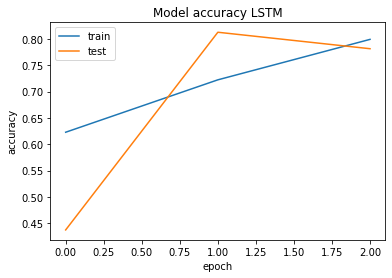

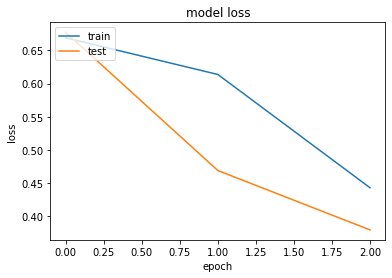

In [62]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy LSTM')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()